<H1>Necessary imports</H1>

In [3]:
from ANFIS.params import FuzzyInputVariable_2Trapezoids
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS.ANFIS import ANFIS
import time
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Dataset preparation: XOR<H1>

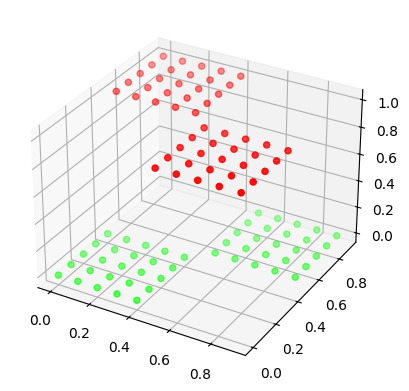

In [4]:
# First let's prepare 3d grid from 0 to 1 with step 0.1
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

# Flattening the grid
dataX = x.flatten() # x values of the grid
dataY = y.flatten() # y values of the grid
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX)))) # adding 1 to the end of each row
dataXY = np.column_stack((dataX,dataY)) # 2d data for ANFIS input

# XOR function for the grid points (True if one of the values is True, False otherwise)
data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5)


# Plotting the data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data points are colored with red if label is True, green otherwise
rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)
plt.show()

<H1>Membership functions</H1>

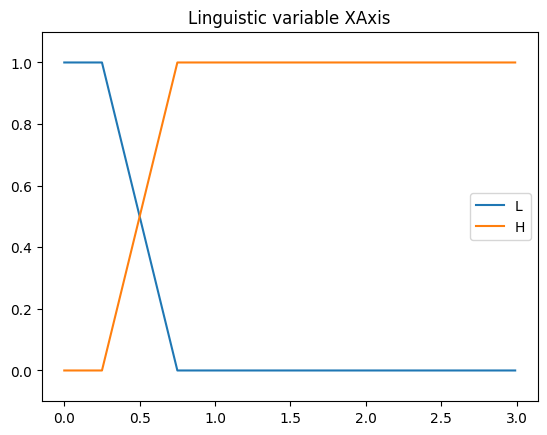

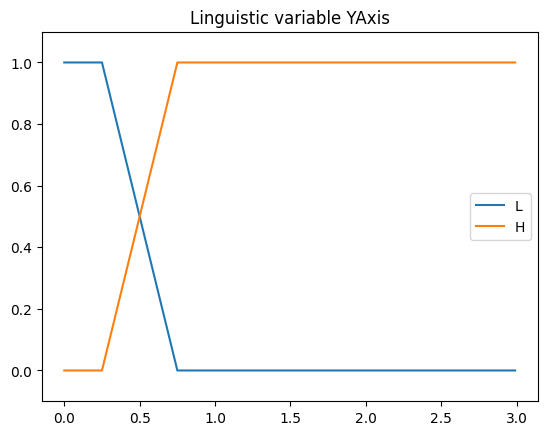

In [5]:
# Membership functions for X and Y axis describing low and high values
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"])
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

# Comment the above and uncomment below to use different membership functions
#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Printing membership functions
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>ANFIS initialization</H1>

Initial params:
Premises:  [[0.5, 0.5], [0.5, 0.5]] 
Conclusions:  [[0.22047135 0.90288925 0.84802032]
 [0.60302237 0.54672368 0.33239606]
 [0.04085639 0.37732898 0.94775683]
 [0.12447847 0.40606567 0.74382874]]


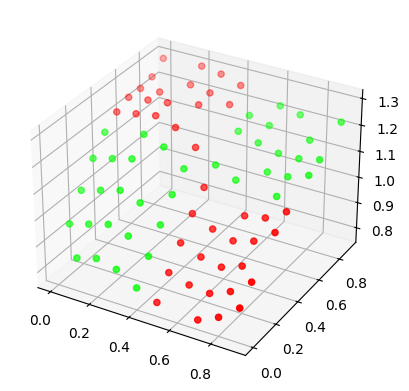

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Initial params:\nPremises: ",fis.premises, "\nConclusions: ", fis.tsk)

fis.show_results()

<H1>ANFIS training</H1>

Optymalization finished!
With errors:   3.119448997170848e-06
No ev:  34814
No it:  50
TIME elapsed:  16.341806650161743


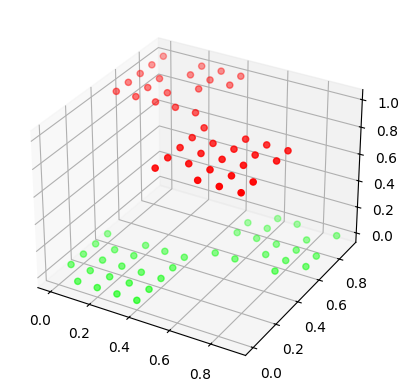

In [7]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

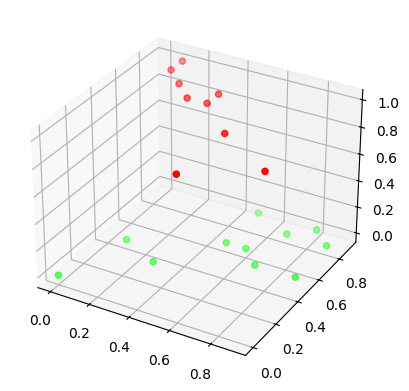

[[TP, FP]
 [FN, TN]]
[[11  0]
 [ 0  9]]


In [8]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print("[[TP, FP]\n [FN, TN]]")
print(confusion_matrix(y_test, y_pred))

<H1>Learned parameters verification</H1>

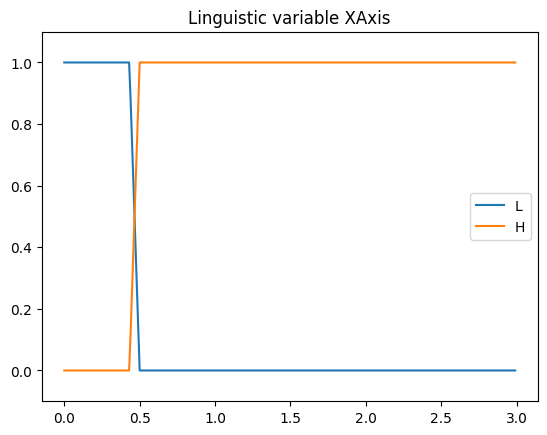

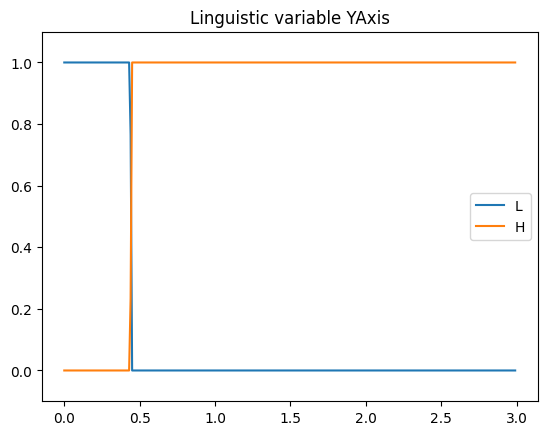

In [9]:
#Membership function visualisation
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [10]:
print("Final params:\nPremises: ", repr(fis.premises), "\nConclusions: ", repr(fis.tsk))
# Save premises and conclusions for the next part of the task
old_premises = fis.premises
old_tsk = fis.tsk

Final params:
Premises:  array([[4.65775456e-01, 6.81047626e-02],
       [4.47655481e-01, 6.46484849e-15]]) 
Conclusions:  array([[1.18093626e-12, 7.84639804e-13, 3.56395959e-12],
       [3.67090018e-18, 1.87936799e-08, 1.00000008e+00],
       [7.55190275e-14, 5.14908479e-07, 9.99999644e-01],
       [2.32494319e-12, 1.92017316e-12, 2.74200716e-12]])


<H1>Check how parameters affect results</H1>

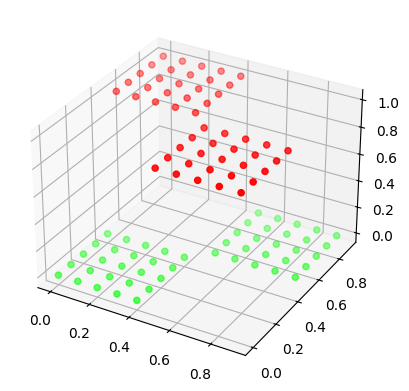

In [11]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

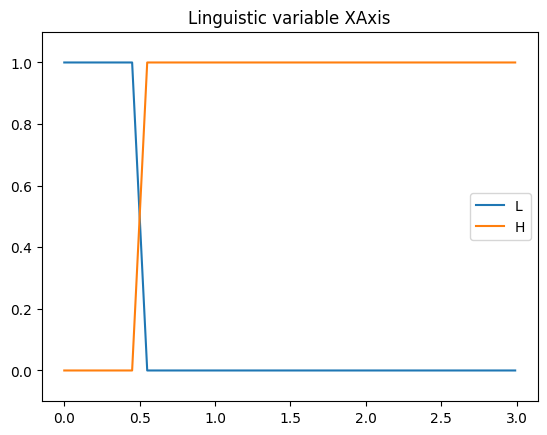

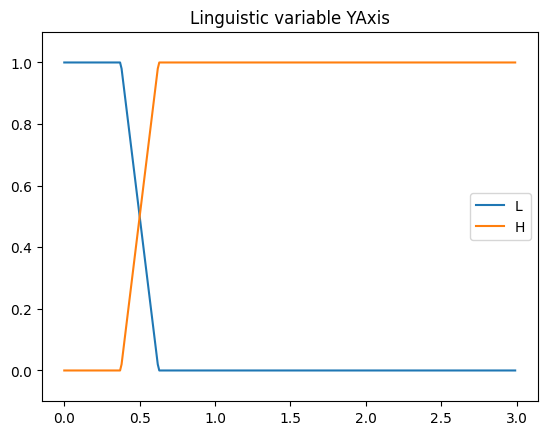

Params after changing:
Premises:  array([[0.5 , 0.1 ],
       [0.5 , 0.25]]) 
Conclusions:  array([[1.18093626e-12, 7.84639804e-13, 3.56395959e-12],
       [3.67090018e-18, 1.87936799e-08, 1.00000008e+00],
       [7.55190275e-14, 5.14908479e-07, 9.99999644e-01],
       [2.32494319e-12, 1.92017316e-12, 2.74200716e-12]])


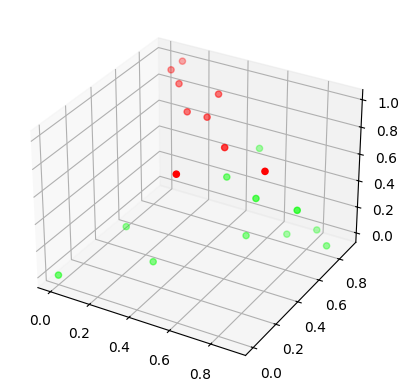

[[TP, FP]
 [FN, TN]]
[[8 3]
 [0 9]]


In [12]:
varX2 = FuzzyInputVariable_2Trapezoids(0.5, 0.1, "XAxis", ["L","H"])
varY2 = FuzzyInputVariable_2Trapezoids(0.5, 0.25, "YAxis", ["L","H"])

#Printing membership functions
plt.figure()
varX2.show()
plt.legend()

plt.figure()
varY2.show()
plt.legend()

plt.show()

fis.premises = np.array([[0.5, 0.1], [0.5, 0.25]])
print("Params after changing:\nPremises: ", repr(fis.premises), "\nConclusions: ", repr(fis.tsk))
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()


y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print("[[TP, FP]\n [FN, TN]]")
print(confusion_matrix(y_test, y_pred))

Changed old conclusions from:
 [[3.51069116e-09 2.52755603e-09 2.39657337e-10]
 [1.16834196e-09 1.63160180e-10 1.00000002e+00]
 [2.78172776e-11 1.57729072e-10 9.99999379e-01]
 [3.77596305e-10 1.67449896e-10 4.86460647e-10]] 
to new random ones:
 [[0.60857087 0.37953344 0.92250764]
 [0.70477417 0.79278828 0.35768887]
 [0.45409447 0.84529746 0.05469253]
 [0.41913786 0.05191223 0.95535439]]


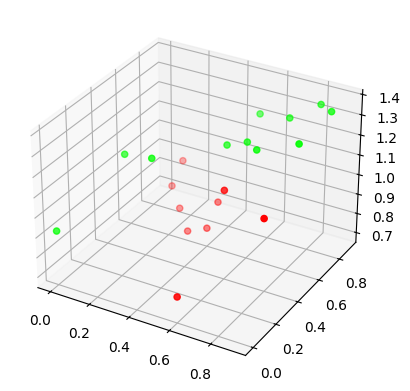

[[TP, FP]
 [FN, TN]]
[[ 0 11]
 [ 0  9]]


In [56]:
# Let's come back to the previous trained premises
fis.premises = old_premises

fis.tsk = np.random.random((4, 3))
print("Changed old conclusions from:\n", old_tsk, "\nto new random ones:\n", fis.tsk)
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print("[[TP, FP]\n [FN, TN]]")
print(confusion_matrix(y_test, y_pred))

<H1>Task</H1>

Train ANFIS to multiply numbers. Start with table 2x2 and increase the size. Analyze the results

In [13]:
%matplotlib auto

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [14]:
%matplotlib inline

<H3>Starting with 2x2 table</H3>

Data XY:
 [[0 0]
 [1 0]
 [0 1]
 [1 1]]
Data labels:
 [0 0 0 1]


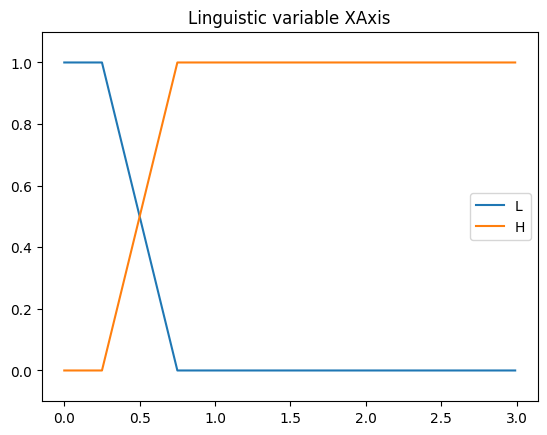

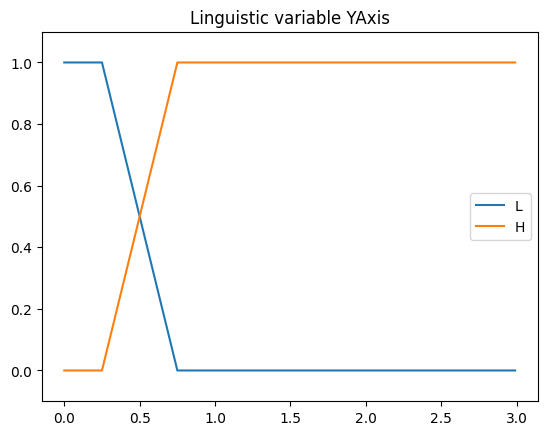

Initial params:
Premises:  [[0.5, 0.5], [0.5, 0.5]] 
Conclusions:  [[0.49794176 0.1946057  0.24971145]
 [0.22020958 0.98633843 0.79678504]
 [0.37719857 0.76060636 0.13125923]
 [0.75835633 0.74214208 0.5680728 ]]


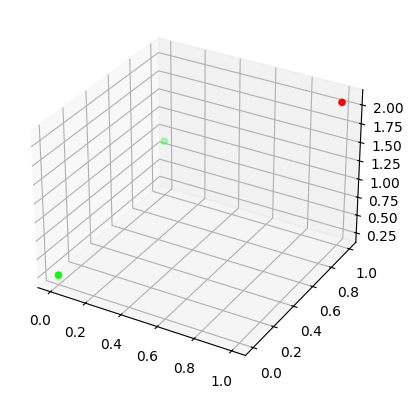

Optymalization finished!
With errors:   2.8685308761348204e-10
No ev:  6395
No it:  40
TIME elapsed: 3.785200834274292
Membership functions after learning


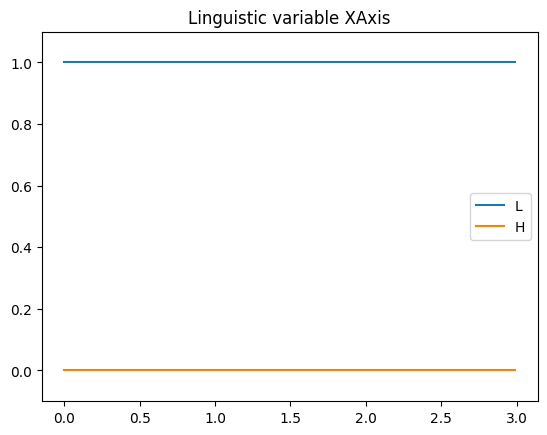

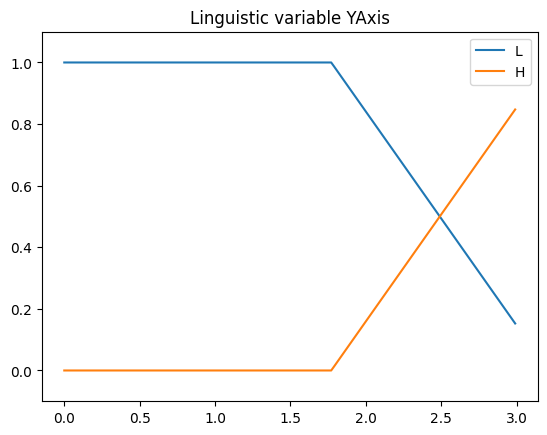

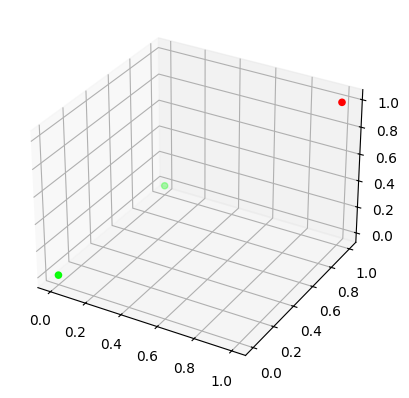

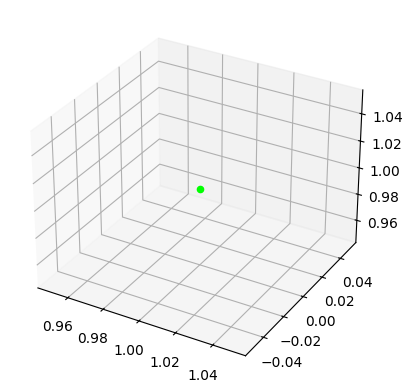

[[TP, FP]
 [FN, TN]]
[[0 1]
 [0 0]]


In [15]:
def generate_data(size):
    """
    Generate data for multiplication of two numbers in range [0,1]
    :param size: size of the grid (size x size)
    :return: dataXY - 2d data for ANFIS input,data_labels - labels for the dataXY
    """
    x = np.arange(0, size, 1)
    x,y = np.meshgrid(x, x)
    dataX = x.flatten() # x values of the grid
    dataY = y.flatten() # y values of the grid
    dataXY = np.column_stack((dataX,dataY)) # 2d data for ANFIS input
    data_labels = dataX * dataY
    print("Data XY:\n" ,dataXY)
    print("Data labels:\n" ,data_labels)
    return dataXY, data_labels

# Generate data for multiplication
dataXY, data_labels = generate_data(2)

# Membership functions for X and Y axis describing low and high values
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"])
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

# Show membership functions
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

# ANFIS initialization
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
fis = ANFIS([varX, varY], X_train.T, y_train)

print("Initial params:\nPremises: ",fis.premises, "\nConclusions: ", fis.tsk)
fis.show_results()

# ANFIS training
start = time.time()
fis.train(True, True, False, True, n_iter=40)
end = time.time()
print("TIME elapsed:", end - start)

print("Membership functions after learning")
plt.figure()
varX.show()
plt.legend()
plt.figure()
varY.show()
plt.legend()
plt.show()

fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print("[[TP, FP]\n [FN, TN]]")
print(confusion_matrix(y_test, y_pred))

<H3>3x3 table</H3>

Data XY:
 [[0 0]
 [1 0]
 [2 0]
 [0 1]
 [1 1]
 [2 1]
 [0 2]
 [1 2]
 [2 2]]
Data labels:
 [0 0 0 0 1 2 0 2 4]


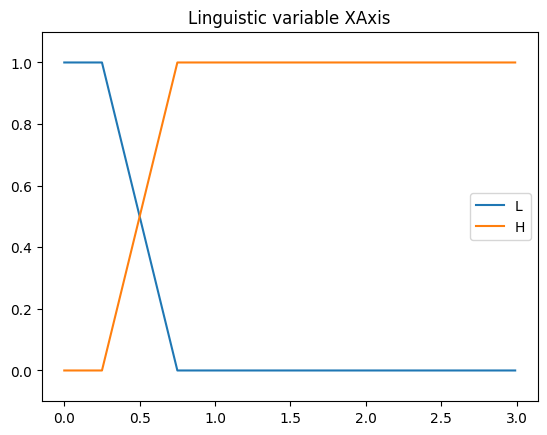

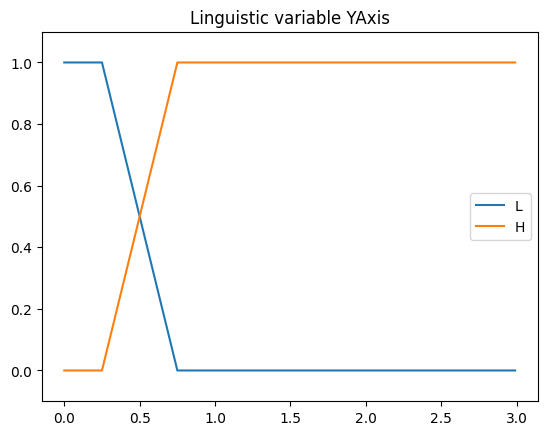

Initial params:
Premises:  [[0.5, 0.5], [0.5, 0.5]] 
Conclusions:  [[0.75886992 0.83851427 0.20201724]
 [0.10566976 0.36325855 0.64263814]
 [0.42423117 0.62959919 0.73938998]
 [0.4259302  0.32855968 0.75920673]]


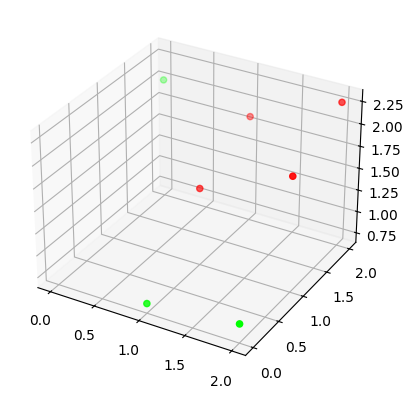

Optymalization finished!
With errors:   1.777084684252401e-11
No ev:  12698
No it:  40
TIME elapsed: 9.227268934249878
Membership functions after learning


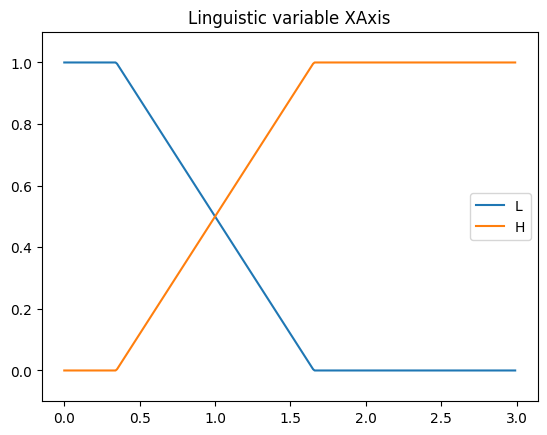

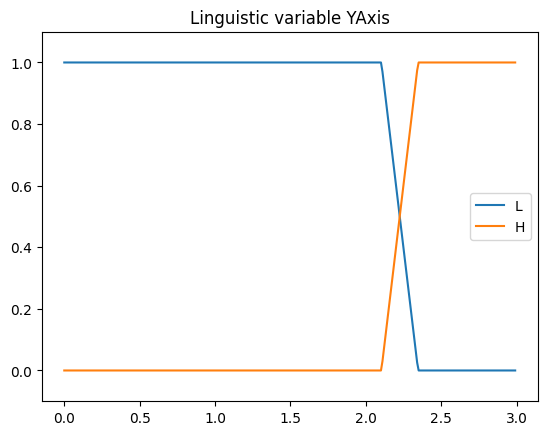

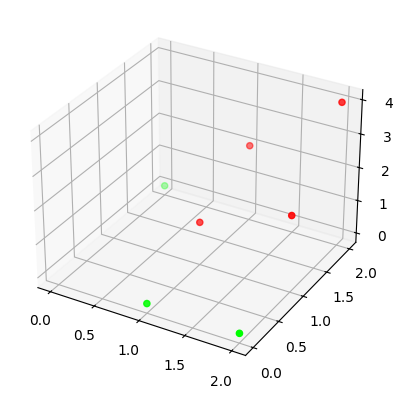

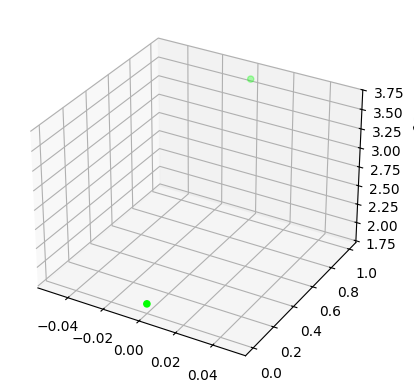

[[TP, FP]
 [FN, TN]]
[[2]]


/home/skuban/.var/app/com.jetbrains.PyCharm-Professional/cache/pypoetry/virtualenvs/intelligentsystems-6gF31eWx-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [16]:
# Generate data for multiplication
dataXY, data_labels = generate_data(3)

# Membership functions for X and Y axis describing low and high values
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"])
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

# Show membership functions
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

# ANFIS initialization
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
fis = ANFIS([varX, varY], X_train.T, y_train)

print("Initial params:\nPremises: ",fis.premises, "\nConclusions: ", fis.tsk)
fis.show_results()

# ANFIS training
start = time.time()
fis.train(True, True, False, True, n_iter=40)
end = time.time()
print("TIME elapsed:", end - start)

print("Membership functions after learning")
plt.figure()
varX.show()
plt.legend()
plt.figure()
varY.show()
plt.legend()
plt.show()

fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print("[[TP, FP]\n [FN, TN]]")
print(confusion_matrix(y_test, y_pred))


<H3>4x4 table</H3>

Data XY:
 [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]]
Data labels:
 [0 0 0 0 0 1 2 3 0 2 4 6 0 3 6 9]


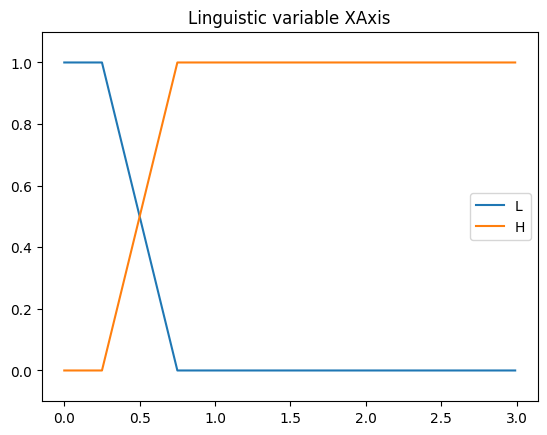

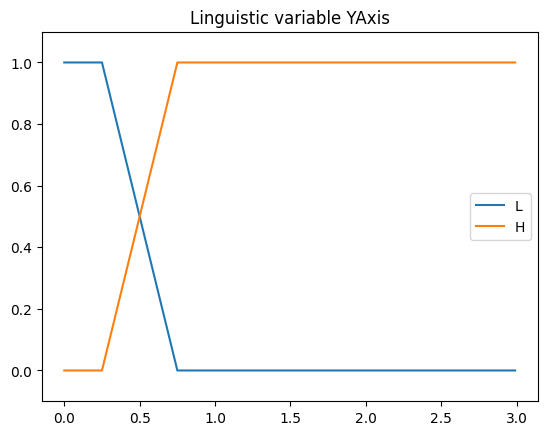

Initial params:
Premises:  [[0.5, 0.5], [0.5, 0.5]] 
Conclusions:  [[0.09680489 0.83010331 0.59169653]
 [0.72653208 0.02287224 0.42987376]
 [0.82693686 0.07724042 0.52798147]
 [0.34982446 0.42382564 0.55098868]]


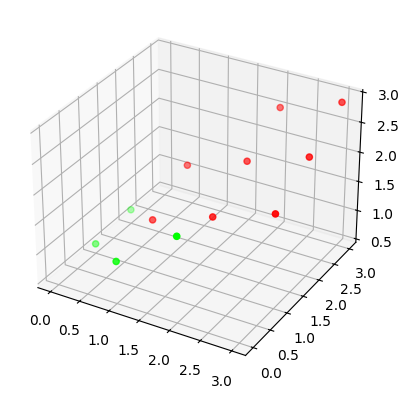

Optymalization finished!
With errors:   1.3563225442564255e-06
No ev:  26355
No it:  40
TIME elapsed: 11.781594038009644
Membership functions after learning


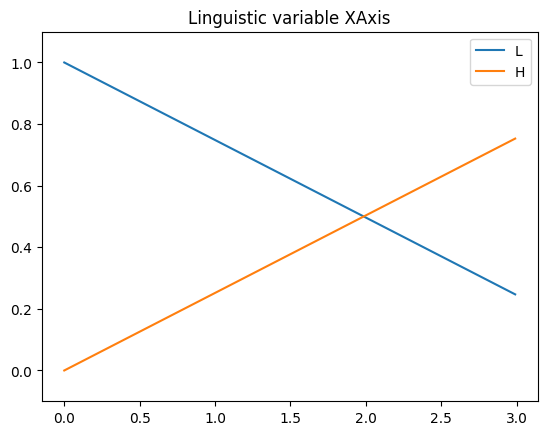

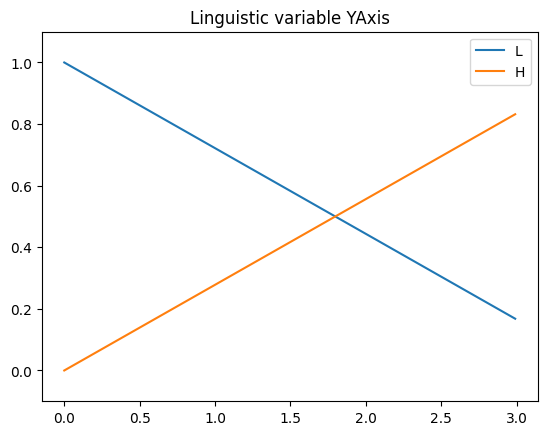

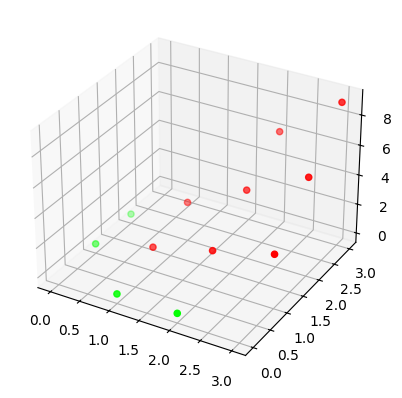

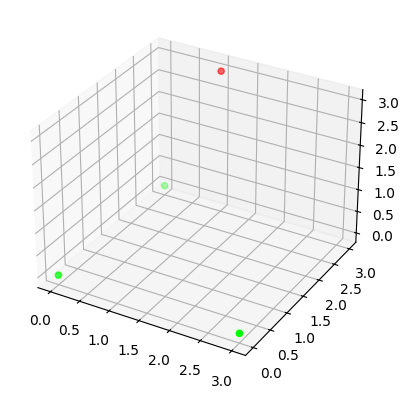

[[TP, FP]
 [FN, TN]]
[[3 0]
 [0 1]]


In [17]:
# Generate data for multiplication
dataXY, data_labels = generate_data(4)

# Membership functions for X and Y axis describing low and high values
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"])
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

# Show membership functions
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

# ANFIS initialization
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
fis = ANFIS([varX, varY], X_train.T, y_train)

print("Initial params:\nPremises: ",fis.premises, "\nConclusions: ", fis.tsk)
fis.show_results()

# ANFIS training
start = time.time()
fis.train(True, True, False, True, n_iter=40)
end = time.time()
print("TIME elapsed:", end - start)

print("Membership functions after learning")
plt.figure()
varX.show()
plt.legend()
plt.figure()
varY.show()
plt.legend()
plt.show()

fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print("[[TP, FP]\n [FN, TN]]")
print(confusion_matrix(y_test, y_pred))


<H3>5x5 table</H3>

Data XY:
 [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [0 4]
 [1 4]
 [2 4]
 [3 4]
 [4 4]]
Data labels:
 [ 0  0  0  0  0  0  1  2  3  4  0  2  4  6  8  0  3  6  9 12  0  4  8 12
 16]


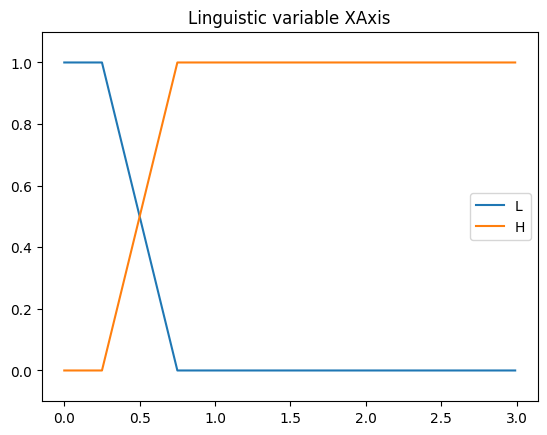

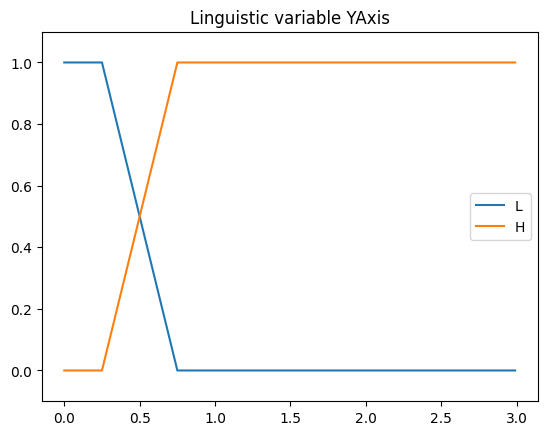

Initial params:
Premises:  [[0.5, 0.5], [0.5, 0.5]] 
Conclusions:  [[0.92156638 0.4796588  0.58149538]
 [0.16958621 0.57548538 0.86606887]
 [0.17940184 0.74834549 0.80504654]
 [0.50130794 0.9247162  0.3844697 ]]


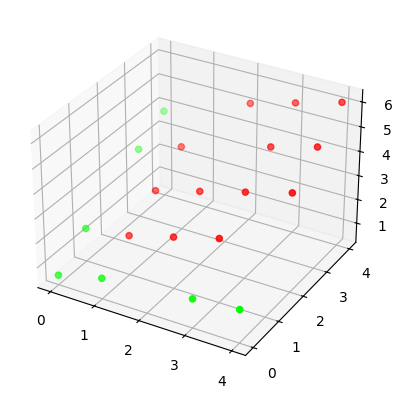

Optymalization finished!
With errors:   3.086539399131149e-06
No ev:  33450
No it:  40
TIME elapsed: 9.440181016921997
Membership functions after learning


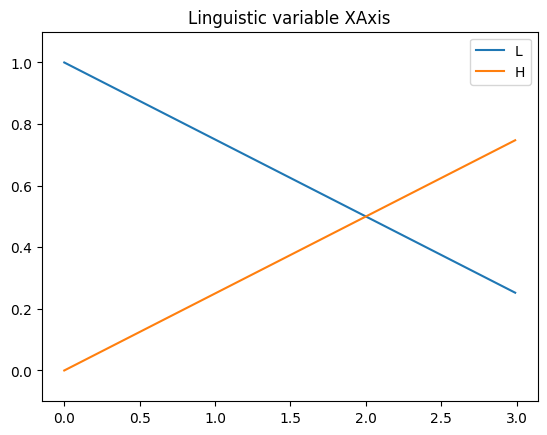

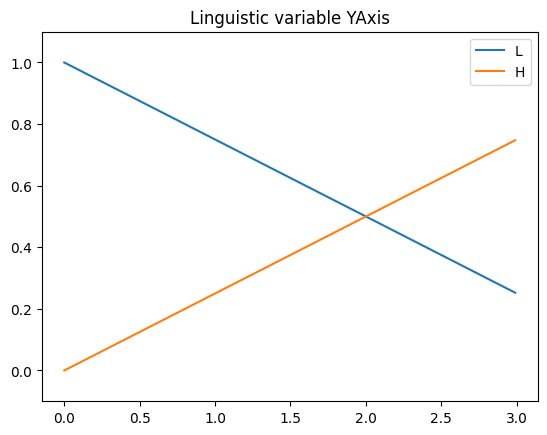

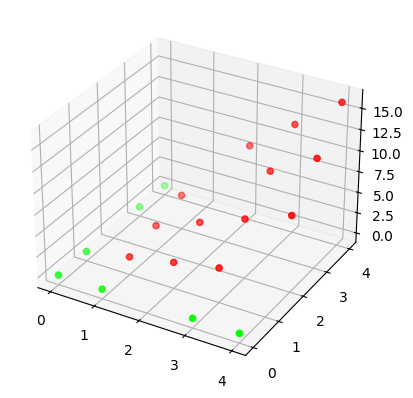

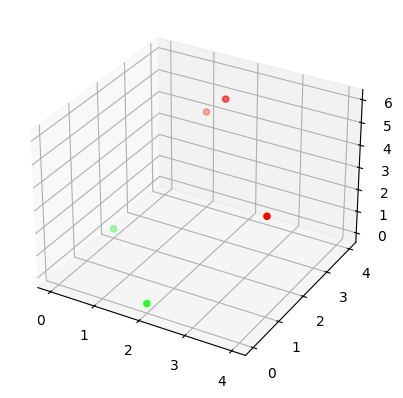

y_test:
 [0 4 6 0 4]
y_pred:
 [0, 4, 6, 0, 4]
[[2 0 0]
 [0 2 0]
 [0 0 1]]


In [62]:
# Generate data for multiplication
dataXY, data_labels = generate_data(5)

# Membership functions for X and Y axis describing low and high values
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"])
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

# Show membership functions
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

# ANFIS initialization
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
fis = ANFIS([varX, varY], X_train.T, y_train)

print("Initial params:\nPremises: ",fis.premises, "\nConclusions: ", fis.tsk)
fis.show_results()

# ANFIS training
start = time.time()
fis.train(True, True, False, True, n_iter=40)
end = time.time()
print("TIME elapsed:", end - start)

print("Membership functions after learning")
plt.figure()
varX.show()
plt.legend()
plt.figure()
varY.show()
plt.legend()
plt.show()

fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print("y_test:\n",y_test)
print("y_pred:\n",y_pred)
print(confusion_matrix(y_test, y_pred))


<H3>7x7 table</H3>

Data XY:
 [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [6 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [6 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]
 [6 3]
 [0 4]
 [1 4]
 [2 4]
 [3 4]
 [4 4]
 [5 4]
 [6 4]
 [0 5]
 [1 5]
 [2 5]
 [3 5]
 [4 5]
 [5 5]
 [6 5]
 [0 6]
 [1 6]
 [2 6]
 [3 6]
 [4 6]
 [5 6]
 [6 6]]
Data labels:
 [ 0  0  0  0  0  0  0  0  1  2  3  4  5  6  0  2  4  6  8 10 12  0  3  6
  9 12 15 18  0  4  8 12 16 20 24  0  5 10 15 20 25 30  0  6 12 18 24 30
 36]


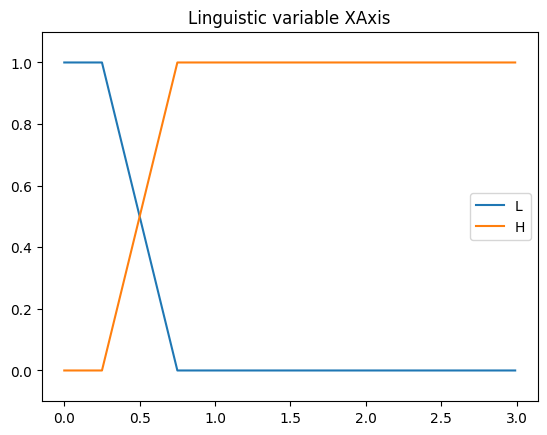

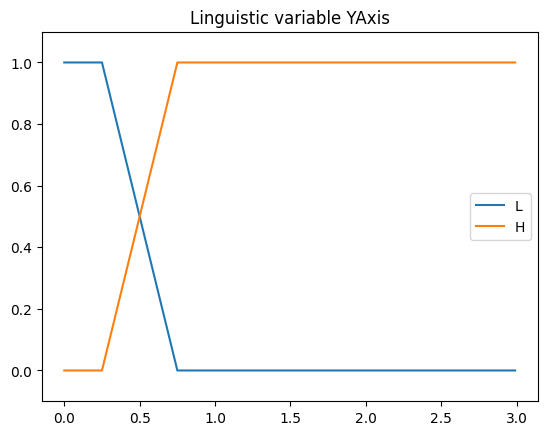

Initial params:
Premises:  [[0.5, 0.5], [0.5, 0.5]] 
Conclusions:  [[0.87333257 0.06048895 0.6622929 ]
 [0.62592077 0.33964877 0.19817562]
 [0.38056413 0.24649533 0.79864374]
 [0.85291076 0.5263728  0.91936214]]


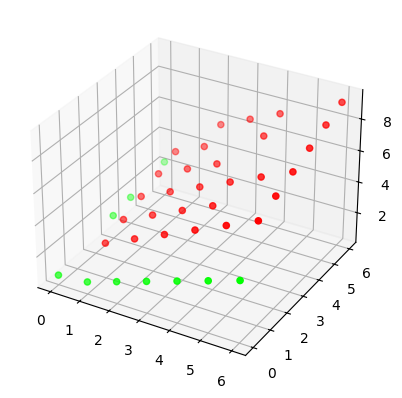

Optymalization finished!
With errors:   33.58739844015133
No ev:  30263
No it:  40
TIME elapsed: 9.55057430267334
Membership functions after learning


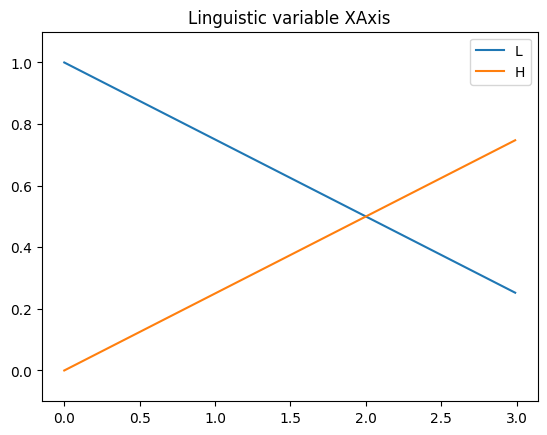

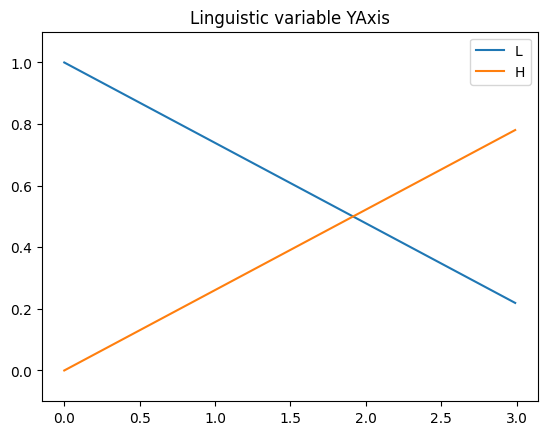

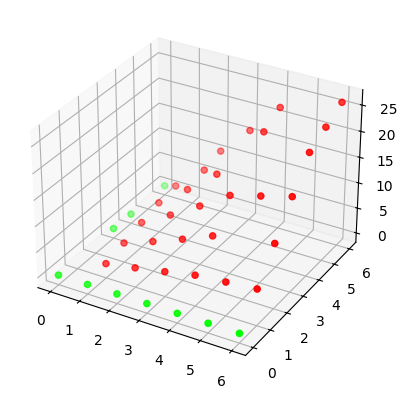

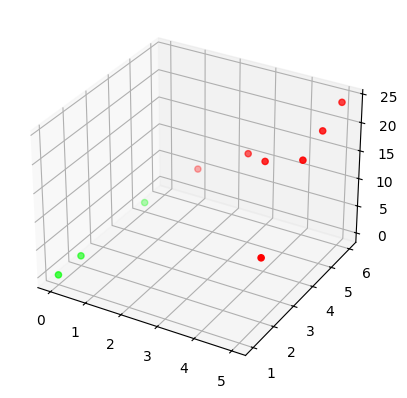

y_test:
 [ 6  0 25 20 30  0 16 10 15  0]
y_pred:
 [5, 0, 22, 20, 24, 0, 18, 10, 15, 0]
[[3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]]


In [64]:
# Generate data for multiplication
dataXY, data_labels = generate_data(7)

# Membership functions for X and Y axis describing low and high values
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"])
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

# Show membership functions
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

# ANFIS initialization
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
fis = ANFIS([varX, varY], X_train.T, y_train)

print("Initial params:\nPremises: ",fis.premises, "\nConclusions: ", fis.tsk)
fis.show_results()

# ANFIS training
start = time.time()
fis.train(True, True, False, True, n_iter=40)
end = time.time()
print("TIME elapsed:", end - start)

print("Membership functions after learning")
plt.figure()
varX.show()
plt.legend()
plt.figure()
varY.show()
plt.legend()
plt.show()

fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print("y_test:\n",y_test)
print("y_pred:\n",y_pred)
print(confusion_matrix(y_test, y_pred))


<H3>11x11 table</H3>

Data XY:
 [[ 0  0]
 [ 1  0]
 [ 2  0]
 [ 3  0]
 [ 4  0]
 [ 5  0]
 [ 6  0]
 [ 7  0]
 [ 8  0]
 [ 9  0]
 [10  0]
 [ 0  1]
 [ 1  1]
 [ 2  1]
 [ 3  1]
 [ 4  1]
 [ 5  1]
 [ 6  1]
 [ 7  1]
 [ 8  1]
 [ 9  1]
 [10  1]
 [ 0  2]
 [ 1  2]
 [ 2  2]
 [ 3  2]
 [ 4  2]
 [ 5  2]
 [ 6  2]
 [ 7  2]
 [ 8  2]
 [ 9  2]
 [10  2]
 [ 0  3]
 [ 1  3]
 [ 2  3]
 [ 3  3]
 [ 4  3]
 [ 5  3]
 [ 6  3]
 [ 7  3]
 [ 8  3]
 [ 9  3]
 [10  3]
 [ 0  4]
 [ 1  4]
 [ 2  4]
 [ 3  4]
 [ 4  4]
 [ 5  4]
 [ 6  4]
 [ 7  4]
 [ 8  4]
 [ 9  4]
 [10  4]
 [ 0  5]
 [ 1  5]
 [ 2  5]
 [ 3  5]
 [ 4  5]
 [ 5  5]
 [ 6  5]
 [ 7  5]
 [ 8  5]
 [ 9  5]
 [10  5]
 [ 0  6]
 [ 1  6]
 [ 2  6]
 [ 3  6]
 [ 4  6]
 [ 5  6]
 [ 6  6]
 [ 7  6]
 [ 8  6]
 [ 9  6]
 [10  6]
 [ 0  7]
 [ 1  7]
 [ 2  7]
 [ 3  7]
 [ 4  7]
 [ 5  7]
 [ 6  7]
 [ 7  7]
 [ 8  7]
 [ 9  7]
 [10  7]
 [ 0  8]
 [ 1  8]
 [ 2  8]
 [ 3  8]
 [ 4  8]
 [ 5  8]
 [ 6  8]
 [ 7  8]
 [ 8  8]
 [ 9  8]
 [10  8]
 [ 0  9]
 [ 1  9]
 [ 2  9]
 [ 3  9]
 [ 4  9]
 [ 5  9]
 [ 6  9]
 [ 7  9]
 [ 8  9]
 [ 9  9]
 [10  9]


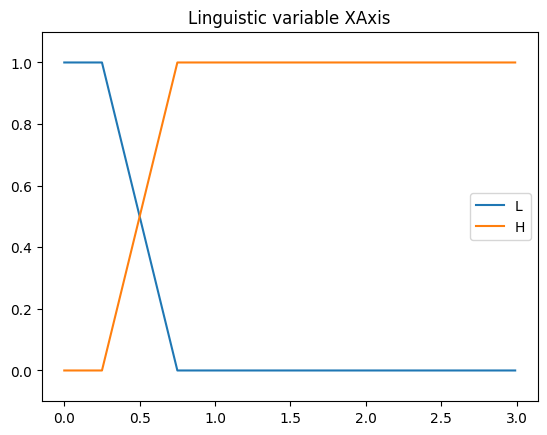

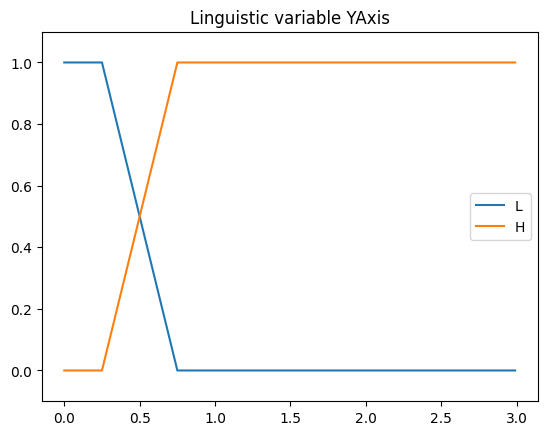

Initial params:
Premises:  [[0.5, 0.5], [0.5, 0.5]] 
Conclusions:  [[0.29106011 0.42990796 0.35221881]
 [0.58555106 0.86446692 0.23579735]
 [0.63549039 0.56547349 0.89754123]
 [0.91984031 0.74764241 0.00234256]]


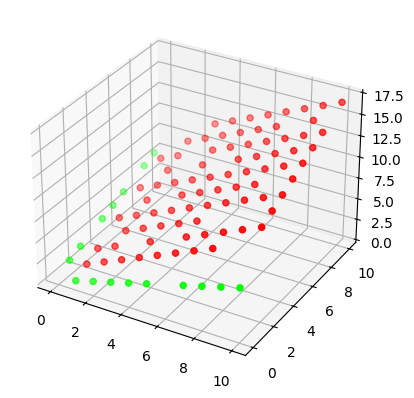

Optymalization finished!
With errors:   868.7094186170754
No ev:  19450
No it:  40
TIME elapsed: 4.935698509216309
Membership functions after learning


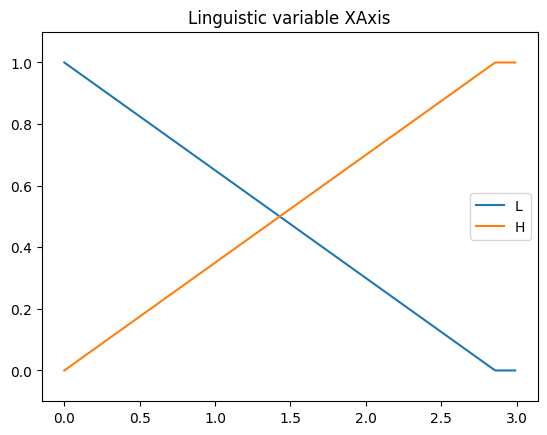

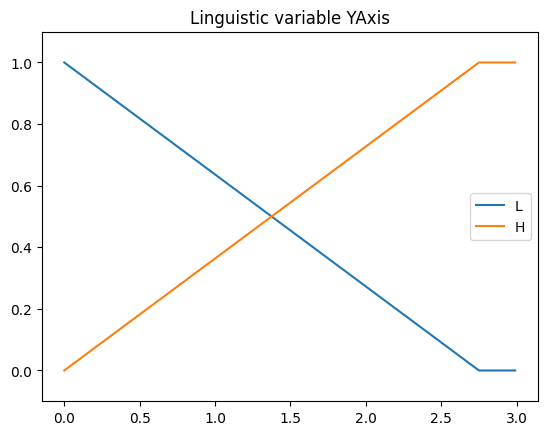

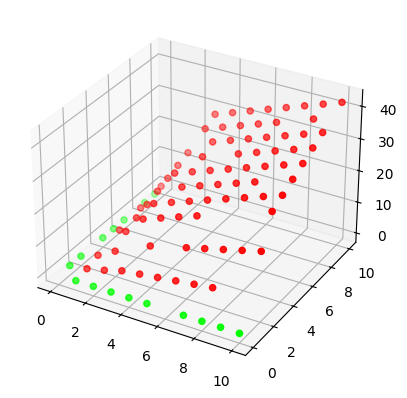

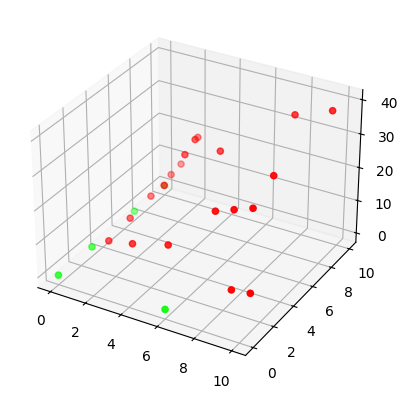

y_test:
 [10 24  7  3  0 10  0  0 10  9  0 72 45 21  9  5 24  0 20 27 90 35  6 15
 21]
y_pred:
 [9, 24, 6, 3, 0, 12, 0, 0, 8, 8, 0, 36, 30, 22, 8, 5, 24, 0, 18, 26, 40, 26, 9, 18, 22]
[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [63]:
# Generate data for multiplication
dataXY, data_labels = generate_data(11)

# Membership functions for X and Y axis describing low and high values
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"])
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

# Show membership functions
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

# ANFIS initialization
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)
fis = ANFIS([varX, varY], X_train.T, y_train)

print("Initial params:\nPremises: ",fis.premises, "\nConclusions: ", fis.tsk)
fis.show_results()

# ANFIS training
start = time.time()
fis.train(True, True, False, True, n_iter=40)
end = time.time()
print("TIME elapsed:", end - start)

print("Membership functions after learning")
plt.figure()
varX.show()
plt.legend()
plt.figure()
varY.show()
plt.legend()
plt.show()

fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print("y_test:\n",y_test)
print("y_pred:\n",y_pred)
print(confusion_matrix(y_test, y_pred))
